### Appliances Hamzat

In [1]:
#data cleaning and manipulation libraries
import numpy as np
import pandas as pd 

#visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#text processing library
from textblob import TextBlob

In [2]:
appliances_df = pd.read_csv("appliances.csv")

In [3]:
appliances_df.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,vote,image
0,0,5,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,James. Backus,I like this as a vent as well as something tha...,NaN,NaN
1,1,5,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,kevin.,good item,NaN,NaN
2,2,5,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,CDBrannom,Fit my new LG dryer perfectly.,NaN,NaN
3,3,5,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,Calvin E Reames,Good value for electric dryers,NaN,NaN
4,4,5,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,albert j. kong,Price and delivery was excellent.,NaN,NaN


In [4]:
appliances_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2277 non-null   int64 
 1   overall       2277 non-null   int64 
 2   verified      2277 non-null   bool  
 3   reviewTime    2277 non-null   object
 4   reviewerID    2277 non-null   object
 5   asin          2277 non-null   object
 6   reviewerName  2277 non-null   object
 7   reviewText    2277 non-null   object
 8   vote          2074 non-null   object
 9   image         828 non-null    object
dtypes: bool(1), int64(2), object(7)
memory usage: 162.5+ KB


In [5]:
appliances_df = appliances_df.drop(['vote','image',], axis=1)
appliances_df.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText
0,0,5,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,James. Backus,I like this as a vent as well as something tha...
1,1,5,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,kevin.,good item
2,2,5,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,CDBrannom,Fit my new LG dryer perfectly.
3,3,5,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,Calvin E Reames,Good value for electric dryers
4,4,5,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,albert j. kong,Price and delivery was excellent.


In [6]:
del appliances_df["Unnamed: 0"]

In [7]:
appliances_df['reviewTime'] = pd.to_datetime(appliances_df['reviewTime'])

In [8]:
appliances_df.rename(columns={"overall":"productRating","asin":"productID",}, inplace=True)
appliances_df.head()

,productRating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText
0,5,True,2013-08-22,A34A1UP40713F8,B00009W3I4,James. Backus,I like this as a vent as well as something tha...
1,5,True,2016-02-08,A1AHW6I678O6F2,B00009W3PA,kevin.,good item
2,5,True,2015-08-05,A8R48NKTGCJDQ,B00009W3PA,CDBrannom,Fit my new LG dryer perfectly.
3,5,True,2015-04-24,AR3OHHHW01A8E,B00009W3PA,Calvin E Reames,Good value for electric dryers
4,5,True,2015-03-21,A2CIEGHZ7L1WWR,B00009W3PA,albert j. kong,Price and delivery was excellent.


In [9]:
appliances_df.groupby('productRating').sum()

,verified
productRating,
1,4
2,7
3,421
4,222
5,1594


In [10]:
appliances_df.groupby('productID').count().sort_values('productRating', ascending = False)

,productRating,verified,reviewTime,reviewerID,reviewerName,reviewText
productID,,,,,,
B0006GVNOA,2040,2040,2040,2040,2040,2040
B0014CN8Y8,24,24,24,24,24,24
B00JGTUQJ6,13,13,13,13,13,13
B0015UGPWQ,12,12,12,12,12,12
B004XLDE5A,8,8,8,8,8,8
B000XXWOGW,8,8,8,8,8,8
B0056I99WG,8,8,8,8,8,8
B00CW0O1EW,8,8,8,8,8,8
B001DPFP88,7,7,7,7,7,7


In [11]:
appliances_df.isnull().sum()

productRating    0
verified         0
reviewTime       0
reviewerID       0
productID        0
reviewerName     0
reviewText       0
dtype: int64

In [12]:
appliances_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   productRating  2277 non-null   int64         
 1   verified       2277 non-null   bool          
 2   reviewTime     2277 non-null   datetime64[ns]
 3   reviewerID     2277 non-null   object        
 4   productID      2277 non-null   object        
 5   reviewerName   2277 non-null   object        
 6   reviewText     2277 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 109.1+ KB


In [13]:
appliances_df["reviewText"] = appliances_df["reviewText"].astype(str)

In [14]:
appliances_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   productRating  2277 non-null   int64         
 1   verified       2277 non-null   bool          
 2   reviewTime     2277 non-null   datetime64[ns]
 3   reviewerID     2277 non-null   object        
 4   productID      2277 non-null   object        
 5   reviewerName   2277 non-null   object        
 6   reviewText     2277 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 109.1+ KB


In [15]:
appliances_df["reviewTime"] = pd.to_datetime(appliances_df["reviewTime"] )

In [16]:
appliances_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   productRating  2277 non-null   int64         
 1   verified       2277 non-null   bool          
 2   reviewTime     2277 non-null   datetime64[ns]
 3   reviewerID     2277 non-null   object        
 4   productID      2277 non-null   object        
 5   reviewerName   2277 non-null   object        
 6   reviewText     2277 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 109.1+ KB


### Analysis with datetimes

In [17]:
time_span = appliances_df["reviewTime"].max() - appliances_df["reviewTime"].min()

print ("Time span of the data: {}".format(time_span))

Time span of the data: 3500 days 00:00:00


In [18]:
appliances_df["year"] = appliances_df["reviewTime"].dt.year
appliances_df["yearMonth"] = appliances_df['reviewTime'].apply(lambda x: x.strftime('%B-%Y'))

In [19]:
appliances_df.head()

,productRating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText,year,yearMonth
0,5,True,2013-08-22,A34A1UP40713F8,B00009W3I4,James. Backus,I like this as a vent as well as something tha...,2013,August-2013
1,5,True,2016-02-08,A1AHW6I678O6F2,B00009W3PA,kevin.,good item,2016,February-2016
2,5,True,2015-08-05,A8R48NKTGCJDQ,B00009W3PA,CDBrannom,Fit my new LG dryer perfectly.,2015,August-2015
3,5,True,2015-04-24,AR3OHHHW01A8E,B00009W3PA,Calvin E Reames,Good value for electric dryers,2015,April-2015
4,5,True,2015-03-21,A2CIEGHZ7L1WWR,B00009W3PA,albert j. kong,Price and delivery was excellent.,2015,March-2015


In [20]:
year_count = appliances_df.groupby("year").count().sort_values("reviewText", ascending=False)[["reviewText"]]
year_count.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("AMOUNT OF REVIEWS PER YEAR:")
year_count

AMOUNT OF REVIEWS PER YEAR:


,numberOfReviews
year,
2016,1275
2015,286
2017,220
2011,214
2018,209
2014,49
2013,18
2008,2
2010,2


In [21]:
month_count = appliances_df.groupby("yearMonth").count()[["reviewText"]]
month_count.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("AMOUNT OF REVIEWS PER MONTH:")
month_count

AMOUNT OF REVIEWS PER MONTH:


,numberOfReviews
yearMonth,
April-2014,2
April-2015,10
April-2016,5
April-2017,2
April-2018,1
August-2011,4
August-2013,3
August-2014,8
August-2015,17


In [22]:
yearly_rating = appliances_df.groupby("year").agg({"reviewText":"count","productRating":"mean"}).sort_values(
    "reviewText",ascending=False)
yearly_rating.rename(columns={"reviewText":"numberOfReviews", "productRating":"averageProductRating"}, inplace=True)

print("AVERAGE RATINGS PER YEAR:")
yearly_rating

AVERAGE RATINGS PER YEAR:


,numberOfReviews,averageProductRating
year,,
2016,1275,4.345882
2015,286,4.905594
2017,220,4.963636
2011,214,4.915888
2018,209,4.009569
2014,49,4.448980
2013,18,4.111111
2008,2,5.000000
2010,2,4.000000


In [23]:
yearly_month_rating = appliances_df.groupby(["yearMonth"]).agg({"reviewText":"count", "productRating":"mean"})
yearly_month_rating.rename(columns={"reviewText":"numberOfReviews", "productRating":"averageProductRating"}, inplace=True)

print("AVERAGE RATINGS PER MONTH:")
yearly_month_rating

AVERAGE RATINGS PER MONTH:


,numberOfReviews,averageProductRating
yearMonth,,
April-2014,2,4.000000
April-2015,10,5.000000
April-2016,5,5.000000
April-2017,2,4.000000
April-2018,1,5.000000
August-2011,4,2.000000
August-2013,3,4.333333
August-2014,8,4.375000
August-2015,17,4.058824


In [24]:
len(appliances_df["year"].unique())

10

#### Visualisations

Text(0.5, 1.0, 'Number of reviews per year')

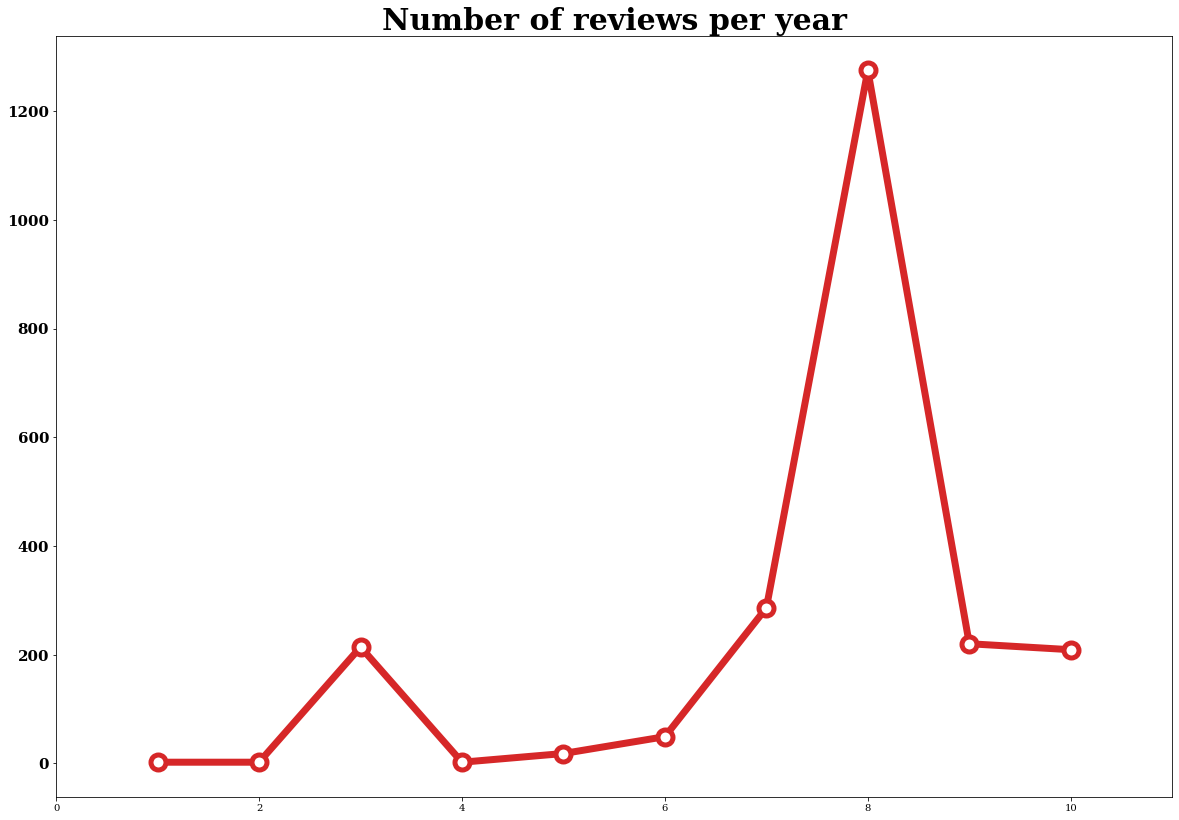

In [25]:
review_count_y  = appliances_df.groupby(['year']).count()[['reviewText']]
axes1 =review_count_y
x = np.arange(1,11)

plt.rc('font', family = 'serif')
fig, ax  = plt.subplots(figsize = (20,14))
plt.xlim(0,11)

ax.plot(x, axes1.reviewText, 'tab:red', lw = 7)
ax.plot(x, axes1.reviewText, 'wo', markersize = 15, markeredgecolor = 'tab:red', markeredgewidth = 5, label = 'Number of reviews')      
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'black')

plt.title('Number of reviews per year', fontsize = 30, fontweight = 'bold', color = 'black')

<ipython-input-26-8cf2e8194cd8>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation = 90)


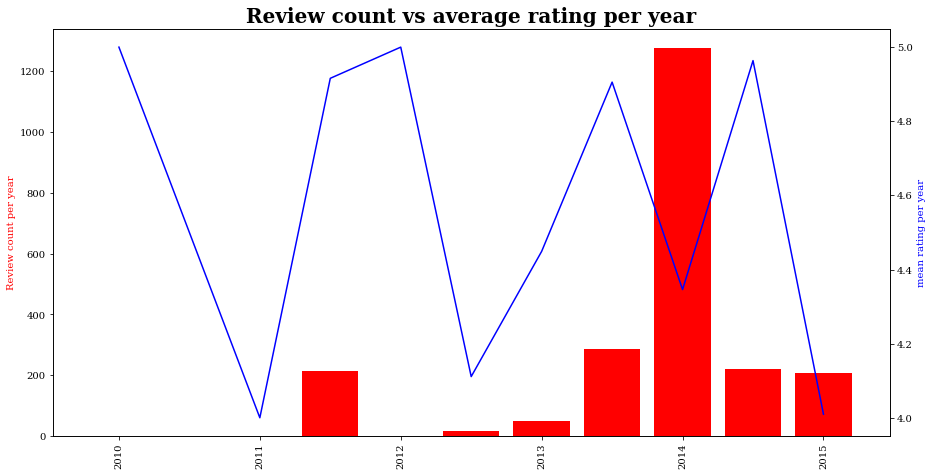

In [26]:
axes1 = appliances_df.groupby(['year']).count()[['reviewText']]
axes2 = appliances_df.groupby('year').mean()[['productRating']]

key = [key for key, df in appliances_df.groupby('year')]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, axes1.reviewText, color = 'r')
ax2.plot(key, axes2.productRating, color = 'b')
ax1.set_xticklabels(key, rotation = 90)
ax1.set_ylabel('Review count per year', color = 'r')
ax2.set_ylabel('mean rating per year', color = 'b')
ax1.set_title('Review count vs average rating per year', fontsize =20, fontweight="bold")
fig = plt.gcf()
fig.set_size_inches(15, 7.5)
#fig.savefig('test2png.png', dpi=100)
plt.show()

<ipython-input-27-590ede0e4d5f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation = 90)


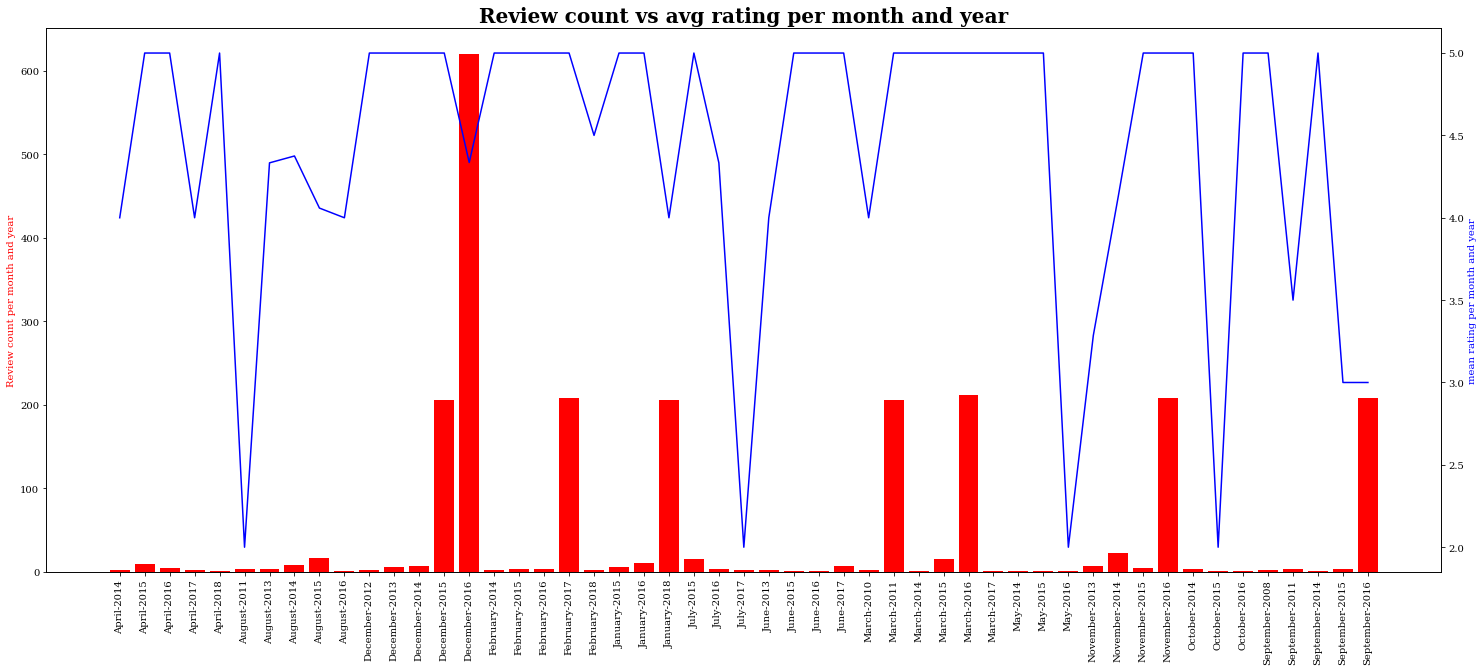

In [27]:
axes1 = appliances_df.groupby(['yearMonth']).count()[['reviewText']]
axes2 = appliances_df.groupby('yearMonth').mean()[['productRating']]

key = [key for key, df in appliances_df.groupby('yearMonth')]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, axes1.reviewText, color = 'r')
ax2.plot(key, axes2.productRating, color = 'b')
ax1.set_xticklabels(key, rotation = 90)
ax1.set_ylabel('Review count per month and year', color = 'r')
ax2.set_ylabel('mean rating per month and year', color = 'b')
ax1.set_title('Review count vs avg rating per month and year', fontsize=20, fontweight="bold")
fig = plt.gcf()
fig.set_size_inches(25, 10)
#fig.savefig('test2png.png', dpi=100)
plt.show()

### Simple sentiment analysis

#### Creating a function to get the sentiment and the sentiment label

In [28]:
def the_sentiment (text):
    blob = TextBlob(text)
    return blob.polarity

def the_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0.05:
        polarity_label = "positive"
    elif blob.polarity < -0.01:
        polarity_label = "negative"
    else:
        polarity_label = "neutral"
    return polarity_label

#### Create new columns for sentiment and sentiment labels

In [29]:
appliances_df["reviewText"] = appliances_df["reviewText"].astype(str)


appliances_df["sentiment"] = appliances_df["reviewText"].apply(the_sentiment)
appliances_df["sentimentLabel"] = appliances_df["reviewText"].apply(the_sentiment_label)

In [30]:
appliances_df.head()

,productRating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText,year,yearMonth,sentiment,sentimentLabel
0,5,True,2013-08-22,A34A1UP40713F8,B00009W3I4,James. Backus,I like this as a vent as well as something tha...,2013,August-2013,0.400000,positive
1,5,True,2016-02-08,A1AHW6I678O6F2,B00009W3PA,kevin.,good item,2016,February-2016,0.700000,positive
2,5,True,2015-08-05,A8R48NKTGCJDQ,B00009W3PA,CDBrannom,Fit my new LG dryer perfectly.,2015,August-2015,0.512121,positive
3,5,True,2015-04-24,AR3OHHHW01A8E,B00009W3PA,Calvin E Reames,Good value for electric dryers,2015,April-2015,0.700000,positive
4,5,True,2015-03-21,A2CIEGHZ7L1WWR,B00009W3PA,albert j. kong,Price and delivery was excellent.,2015,March-2015,1.000000,positive


#### Number of each label

In [31]:
label_count = appliances_df.groupby("sentimentLabel").count().sort_values("sentiment", ascending=False)[["sentiment"]]

print("NUMBER OF POSITVE, NEGATIVE AND NEUTRAL REVIEWS: ")
label_count

NUMBER OF POSITVE, NEGATIVE AND NEUTRAL REVIEWS: 


,sentiment
sentimentLabel,
positive,1822
neutral,448
negative,7


#### Number of geniue good, neutral and bad engines

In [32]:
genuine_good_rating = appliances_df[(appliances_df['sentimentLabel']=='positive') & (appliances_df['productRating']>3)]

print("NUMBER OF GENUINE GOOD RATINGS: {}".format(len(genuine_good_rating)))

NUMBER OF GENUINE GOOD RATINGS: 1392


In [33]:
genuine_neutral_rating = appliances_df[(appliances_df['sentimentLabel']=='neutral') & (appliances_df['productRating']==3)]

print("NUMBER OF GENUINE NEUTRAL RATINGS: {}".format(len(genuine_neutral_rating)))

NUMBER OF GENUINE NEUTRAL RATINGS: 2


In [34]:
genuine_bad_rating = appliances_df[(appliances_df['sentimentLabel']=='negative') & (appliances_df['productRating']<3)]

print("NUMBER OF GENUINE BAD RATINGS: {}".format(len(genuine_bad_rating)))

NUMBER OF GENUINE BAD RATINGS: 5


#### Visualisations

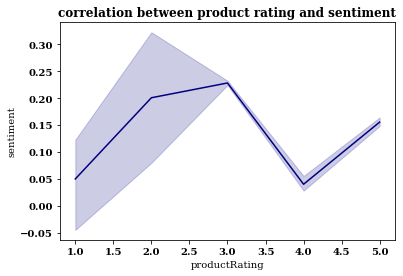

In [35]:
sns.lineplot(data=appliances_df,x='productRating',y='sentiment', color="navy")
plt.title('correlation between product rating and sentiment', fontsize = 12, fontweight = 'bold', color = 'black')
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
plt.show()

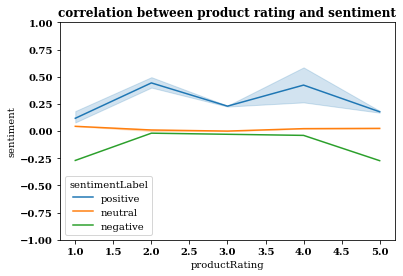

In [36]:
sns.lineplot(data=appliances_df,x='productRating',y='sentiment',hue='sentimentLabel')
plt.ylim(-1,1)
plt.title('correlation between product rating and sentiment', fontsize = 12, fontweight = 'bold', color = 'black')
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
plt.show()

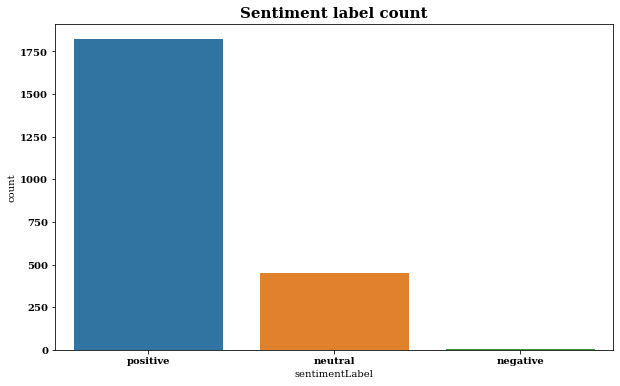

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(data=appliances_df, x="sentimentLabel")
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
plt.title("Sentiment label count", fontsize = 15, fontweight = 'bold', color = 'black')
plt.show()

### Analysis on products (productID)

In [38]:
no_of_products = len(appliances_df["productID"].unique())
print("Amount of products that were reviewed: {}".format(no_of_products))

Amount of products that were reviewed: 48


In [39]:
reviews_per_product = appliances_df.groupby("productID").count().sort_values("reviewText", ascending=False)[["reviewText"]]
reviews_per_product.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("NUMBER OF REVIEWS PER PRODUCT: ")
reviews_per_product

NUMBER OF REVIEWS PER PRODUCT: 


,numberOfReviews
productID,
B0006GVNOA,2040
B0014CN8Y8,24
B00JGTUQJ6,13
B0015UGPWQ,12
B004XLDE5A,8
B000XXWOGW,8
B0056I99WG,8
B00CW0O1EW,8
B001DPFP88,7


In [40]:
top_products = reviews_per_product["numberOfReviews"].nlargest(10)

print("MOST REVIEWED PRODUCTS: \n{}".format(top_products))

MOST REVIEWED PRODUCTS: 
productID
B0006GVNOA    2040
B0014CN8Y8      24
B00JGTUQJ6      13
B0015UGPWQ      12
B004XLDE5A       8
B000XXWOGW       8
B0056I99WG       8
B00CW0O1EW       8
B001DPFP88       7
B000NCTOUM       7
Name: numberOfReviews, dtype: int64


In [41]:
least_products = reviews_per_product["numberOfReviews"].nsmallest(10)

print("LEAST REVIEWED PRODUCTS: \n{}".format(least_products))

LEAST REVIEWED PRODUCTS: 
productID
B00009W3I4    1
B00BIZDI0A    1
B009PCI2JU    1
B0045LLC7K    1
B001DPQPKU    1
B0009GVYNW    1
B0042ACZU2    1
B0042U16YI    2
B0015S4KIO    2
B00149JVOC    2
Name: numberOfReviews, dtype: int64


#### Sentiment labels per product

In [42]:
product_sentiment = appliances_df.groupby(["productID", "sentimentLabel"]).count().sort_values("sentiment", ascending=False)[["sentiment"]]

product_sentiment

sentiment
productID  sentimentLabel           
B0006GVNOA positive             1632
           neutral               408
B0014CN8Y8 positive               20
B00JGTUQJ6 positive               10
B004XLDE5A positive                8
...                              ...
B001DPFP88 neutral                 1
B00186NSGS positive                1
           negative                1
B0009GVYNW positive                1
B0042U16YI neutral                 1

[71 rows x 1 columns]

#### Visualisations

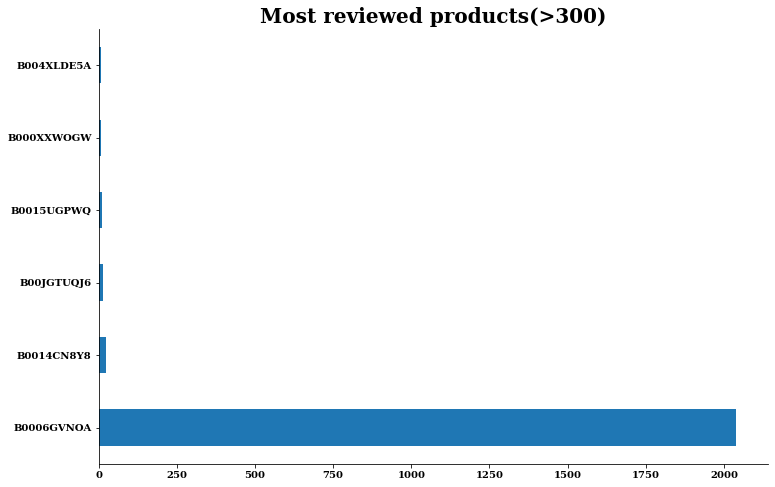

In [43]:
plt.figure(figsize=(12,8))
appliances_df["productID"].value_counts().nlargest(6).plot(kind='barh')
plt.title("Most reviewed products(>300)", fontsize=20, fontweight="bold")
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
sns.despine()
plt.show()

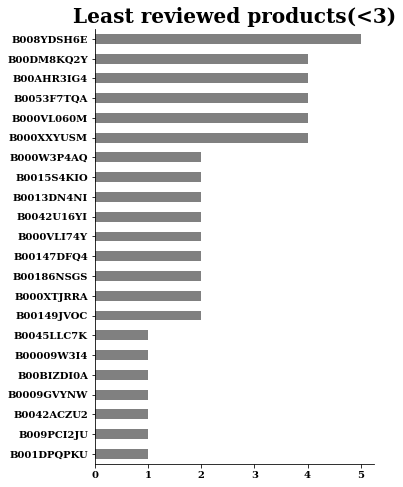

In [44]:
plt.figure(figsize=(5,8))
appliances_df["productID"].value_counts().nsmallest(22).plot(kind='barh', color="grey")
plt.title("Least reviewed products(<3)", fontsize=20, fontweight="bold")
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
sns.despine()
plt.show()

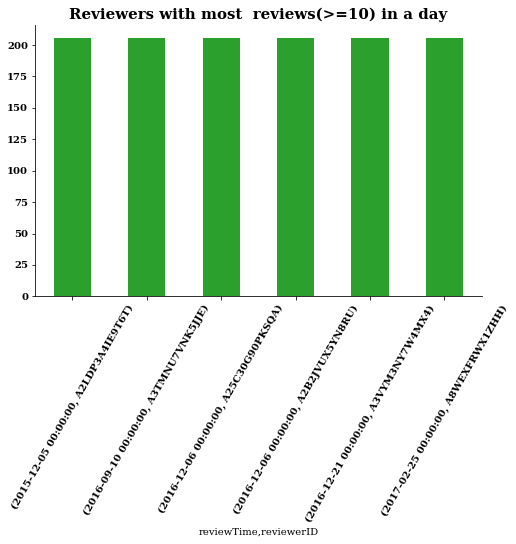

In [47]:
plt.figure(figsize=(8,5))
review_per_day["numberOfReviews"].nlargest(6).plot(kind="bar",color="tab:green")
plt.title("Reviewers with most  reviews(>=10) in a day", fontsize=15, fontweight="bold")
plt.xticks(fontweight = 'bold', color = 'black', rotation=60)       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
sns.despine()
plt.show()

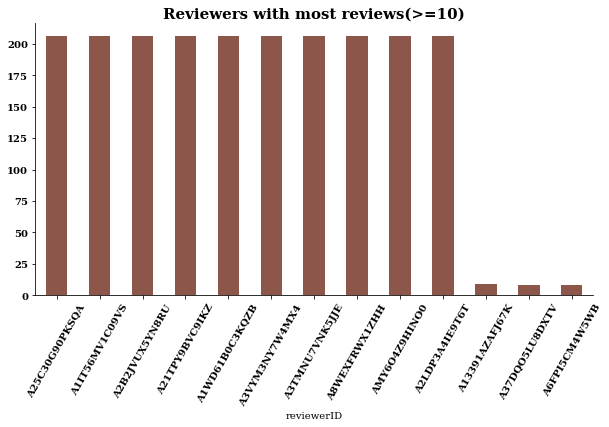

In [50]:
plt.figure(figsize=(10,5))
review_count["numberOfReviews"].nlargest(13).plot(kind="bar",color="tab:brown")
plt.title("Reviewers with most reviews(>=10)", fontsize=15, fontweight="bold")
plt.xticks(fontweight = 'bold', color = 'black', rotation=60)       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
sns.despine()
plt.show()

### Analysis on Reviewers

#### Number of reviewers

In [ ]:
no_of_reviewers = len(appliances_df["reviewerID"].unique())
print("Number of reviewers: {}".format(no_of_products))

#### Review count per reviewer

In [49]:
review_count = appliances_df.groupby("reviewerID").count().sort_values("reviewText", ascending=False)[["reviewText"]]
review_count.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("NUMBER OF REVIEWS PER REVIEWER: ")
review_count

NUMBER OF REVIEWS PER REVIEWER: 


,numberOfReviews
reviewerID,
A25C30G90PKSQA,206
A1IT56MV1C09VS,206
A2B2JVUX5YN8RU,206
A21TPY9BVC9IKZ,206
A1WD61B0C3KQZB,206
A3VYM3NY7W4MX4,206
A3TMNU7VNK5JJE,206
A8WEXFRWX1ZHH,206
AMY6O4Z9HINO0,206


#### Most reviews done in a day per reviewer

In [46]:
review_per_day = appliances_df.groupby(['reviewTime', 'reviewerID']).count().sort_values(
    'reviewText', ascending=False)[["reviewText"]]
review_per_day.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("MOST REVIEWS DONE IN A DAY PER REVIEWER: ")
review_per_day

MOST REVIEWS DONE IN A DAY PER REVIEWER: 


numberOfReviews
reviewTime reviewerID                     
2015-12-05 A2LDP3A4IE9T6T              206
2016-09-10 A3TMNU7VNK5JJE              206
2016-12-06 A25C30G90PKSQA              206
           A2B2JVUX5YN8RU              206
2016-12-21 A3VYM3NY7W4MX4              206
...                                    ...
2014-10-19 A2O7BWHBIV1HWZ                1
2016-05-26 A1HWFUO5PKB2RW                1
2016-06-16 A3J8IC20SGBS2O                1
2015-07-04 AFUVGAUNQVT0S                 1
2018-04-17 A13391AZAFJ67K                1

[107 rows x 1 columns]

### Analysis on product ratings

In [ ]:
axes1 = appliances_df.groupby('productID').count()
axes2 = appliances_df.groupby('productID').mean()

#### Average rating per product

In [51]:
rating_per_product = appliances_df.groupby("productID").agg({"reviewText":"count","productRating":"mean"}).sort_values(
    "reviewText",ascending=False)
rating_per_product.rename(columns={"reviewText":"numberOfReviews", "productRating":"averageProductRating"}, inplace=True)

print("AVERAGE RATING PER PRODUCT:")
rating_per_product

AVERAGE RATING PER PRODUCT:


,numberOfReviews,averageProductRating
productID,,
B0006GVNOA,2040,4.500000
B0014CN8Y8,24,4.500000
B00JGTUQJ6,13,5.000000
B0015UGPWQ,12,4.833333
B004XLDE5A,8,4.500000
B000XXWOGW,8,3.500000
B0056I99WG,8,4.125000
B00CW0O1EW,8,5.000000
B001DPFP88,7,5.000000


#### Average rating per reviewer

In [52]:
rating_per_reviewer = appliances_df.groupby("reviewerID").agg({"reviewText":"count","productRating":"mean"}).sort_values(
    "reviewText",ascending=False)
rating_per_reviewer.rename(columns={"reviewText":"numberOfReviews", "productRating":"averageProductRating"}, inplace=True)

print("AVERAGE RATING PER REVIEWER:")
rating_per_reviewer

AVERAGE RATING PER REVIEWER:


,numberOfReviews,averageProductRating
reviewerID,,
A25C30G90PKSQA,206,3.000000
A1IT56MV1C09VS,206,5.000000
A2B2JVUX5YN8RU,206,5.000000
A21TPY9BVC9IKZ,206,5.000000
A1WD61B0C3KQZB,206,4.000000
A3VYM3NY7W4MX4,206,5.000000
A3TMNU7VNK5JJE,206,3.000000
A8WEXFRWX1ZHH,206,5.000000
AMY6O4Z9HINO0,206,5.000000


#### Least satisfied customers

In [53]:
least_sat_cust = rating_per_reviewer["averageProductRating"].nsmallest(10)

print("LEAST SATISFIED CUSTOMERS: \n{}".format(least_sat_cust))

LEAST SATISFIED CUSTOMERS: 
reviewerID
A3SM7H70QI3TY8    1.0
A3LGZ8M29PBNGG    2.0
AJPRN1TD1A0SD     2.2
A1HWFUO5PKB2RW    2.2
A2HDUVKXR5CM7H    2.6
A25C30G90PKSQA    3.0
A3TMNU7VNK5JJE    3.0
A26Y776G7VVBCQ    3.8
A1WD61B0C3KQZB    4.0
A1OB2H416ARLFJ    4.0
Name: averageProductRating, dtype: float64


#### Visualisations

<ipython-input-54-38da4b36e3de>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation = 90, fontweight="bold")


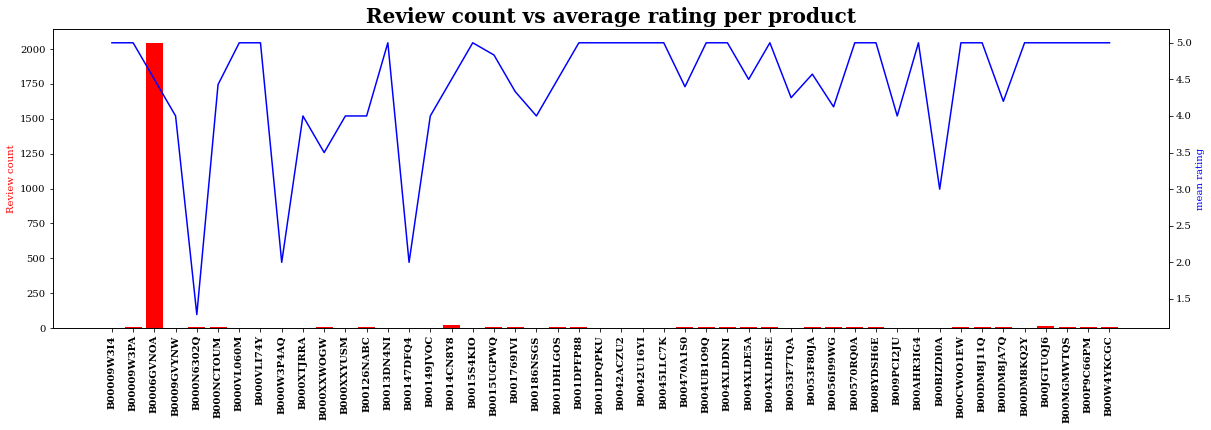

In [54]:
axes1 = appliances_df.groupby('productID').count()
axes2 = appliances_df.groupby('productID').mean()
key = [key for key, df in appliances_df.groupby('productID')]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, axes1.productRating, color = 'r')
ax2.plot(key, axes2.productRating, color = 'b')
ax1.set_xticklabels(key, rotation = 90, fontweight="bold")
ax1.set_ylabel('Review count', color = 'r')
ax2.set_ylabel('mean rating', color = 'b')
ax1.set_title('Review count vs average rating per product', fontsize=20, fontweight="bold")
fig = plt.gcf()
fig.set_size_inches(20, 5.5)
#fig.savefig('test2png.png', dpi=100)
plt.show()